# [Lomb_Scargle](http://docs.astropy.org/en/stable/api/astropy.stats.LombScargle.html#astropy.stats.LombScargle)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

import numpy as np
from numpy import random as nr

In [26]:
 def getfreq(freq,p,minfre=0.001,maxfre=0.03):
    max_p=0
    max_f=0
    for index,(freq_i,p_i) in enumerate(zip(freq,p)):
        if (freq_i>minfre and freq_i<maxfre and p_i>max_p):
            max_p=p_i
            max_f=freq_i
    return max_f,max_p

def gethalffreq(freq,p,minfre=0.001,maxfre=0.03,max_p=1):
    half_err=1
    half_f=1
    half_p=1
    for index,(freq_i,p_i) in enumerate(zip(freq,p)):
        if (freq_i>minfre and freq_i<maxfre and abs(p_i-0.5*max_p)<half_err):
            half_err=abs(p_i-0.5*max_p)
            half_f=freq_i
            half_p=p_i
    return half_f,half_p
            
    

In [52]:
import random


def creat_time(days=4):
    inters=np.random.randint(1,5,days)
    time=np.arange(0,10000,16)
    sizes=np.random.randint(200,500,days)
    t=[]
    interval=0
    for day,inter,size in zip(np.arange(days),inters,sizes):
        interval=interval+inter
        t_sample=nr.choice(time,size,replace=False)+(day+interval)*86400
        print(day,inter,size)
        t=np.hstack([t,t_sample])
    return t

In [75]:
t=creat_time(4)

0 1 288
1 3 423
2 2 339
3 3 250


In [54]:
10000/16,1300000/86400,1/16/2/2

(625.0, 15.046296296296296)

In [76]:
print(len(t),min(t),max(t))
rng=np.random.RandomState(15566)
dy=rng.rand(len(t))*0.1
y=np.sin(2*np.pi*0.00311*t)+dy
#y=np.where(y>0,1,0)

tfit=np.linspace(np.min(t),np.max(t),len(t))
yfit=np.sin(2*np.pi*0.00311*tfit)
#yfit=np.where(yfit>0,1,0)


1300 86416.0 1046784.0


(86416.0, 88416.0)

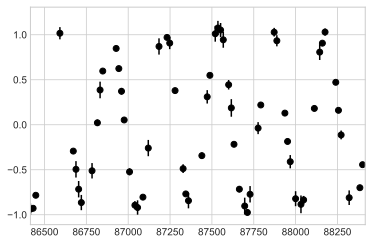

In [79]:
plt.errorbar(t,y,dy,fmt='ok')
plt.xlim(min(t),min(t)+2000)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: divide by zero encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)
/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: invalid value encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


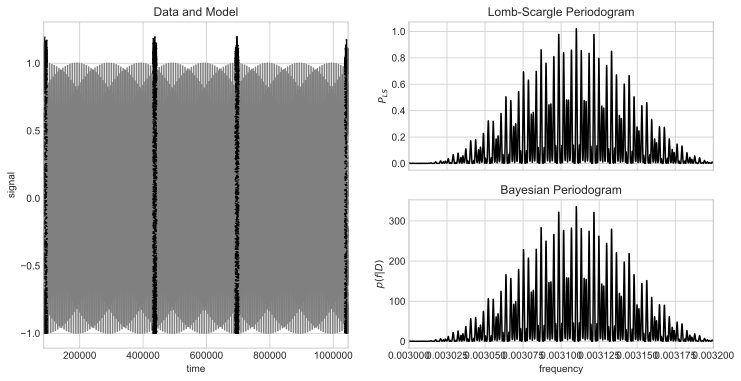

In [82]:
fig = plt.figure(figsize=(12, 6))#
gs = plt.GridSpec(2, 2)
               
ax = fig.add_subplot(gs[:, 0])
ax.plot(tfit, yfit, '-k', color='gray')
ax.errorbar(t, y,dy, fmt='ok', ecolor='black',
            markersize=1, capsize=1)


ax.set(xlim=(np.min(t),np.max(t)),xlabel='time',
       ylabel='signal',
       title='Data and Model')

ls = LombScargle(t, y)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=3.2e-3,
                           samples_per_peak=100)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=3.2e-3,
                       samples_per_peak=100)
#p = np.exp(p)

ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(3e-3, 3.2e-3),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(3e-3,3.2e-3),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')
plt.savefig('testls.png')

In [68]:
freq.size,freq

(224380, array([  0.00000000e+00,   1.42615918e-08,   2.85231836e-08, ...,
          3.19997319e-03,   3.19998745e-03,   3.20000171e-03]))

In [83]:
maxfreq=0.0032
minfreq=0.003
frequency_max,max_p=getfreq(freq,p,minfreq,maxfreq)
half_f,half_p=gethalffreq(freq,p,frequency_max-0.00001,frequency_max+0.00001,max_p)

T=1/frequency_max
print(frequency_max,T,max_p,half_p)
print(half_f,abs(frequency_max-half_f)/(max_p**0.5))

0.00310999533512 321.543890663 335.786125023 168.052383511
0.00311356688269 1.9490593596e-07


(0.0031089953351215367, 0.0031109953351215369)

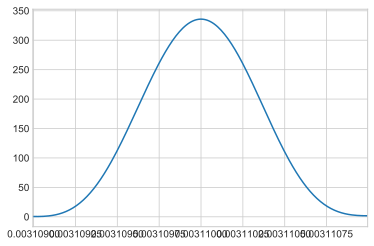

In [84]:
plt.plot(freq,p)
plt.xlim(frequency_max-0.000001,frequency_max+0.000001)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


 (0.003, 0.0032),

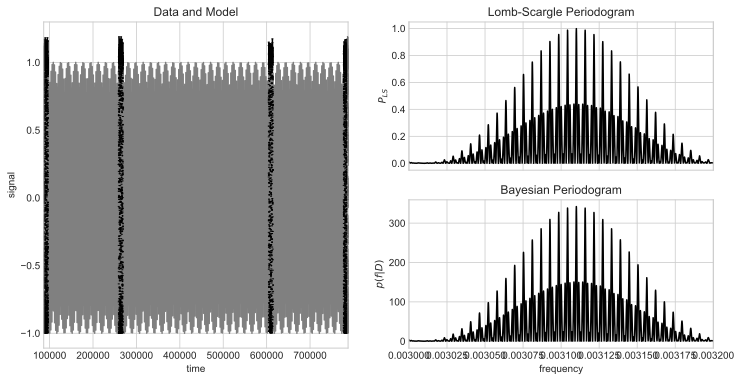

In [71]:
fig = plt.figure(figsize=(12, 6))#
gs = plt.GridSpec(2, 2)
               
ax = fig.add_subplot(gs[:, 0])
ax.plot(tfit, yfit, '-k', color='gray')
ax.errorbar(t, y,dy, fmt='ok', ecolor='black',
            markersize=1, capsize=1)


ax.set(xlim=(np.min(t),np.max(t)),xlabel='time',
       ylabel='signal',
       title='Data and Model')

ls = LombScargle(t, y)
freq, power = ls.autopower(normalization='standard',
                           minimum_frequency=0,
                           maximum_frequency=3.2e-2,
                           samples_per_peak=100)
freq, p = ls.autopower(normalization='psd',
                       minimum_frequency=0,
                       maximum_frequency=3.2e-2,
                       samples_per_peak=100)


ax = [fig.add_subplot(gs[0, 1]),
      fig.add_subplot(gs[1, 1])]
ax[0].plot(freq, power, '-k')
ax[0].set(xlim=(3e-3, 3.2e-3),
          ylabel='$P_{LS}$',
          title='Lomb-Scargle Periodogram')
ax[0].xaxis.set_major_formatter(plt.NullFormatter())

ax[1].plot(freq, p, '-k')
ax[1].set(xlim=(3e-3,3.2e-3),
          xlabel='frequency',
          ylabel='$p(f|D)$',
          title='Bayesian Periodogram')


0.0031099968054 321.54373865 342.139799914 171.138369848
0.0030814023138 1.54589709424e-06


(0.003108996805403432, 0.0031109968054034323)

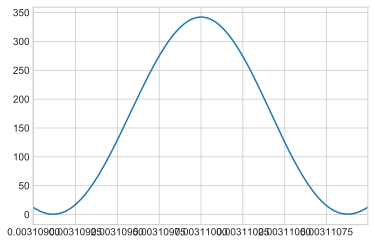

In [74]:
maxfreq=0.0032
minfreq=0.003
frequency_max,max_p=getfreq(freq,p,minfreq,maxfreq)
half_f,half_p=gethalffreq(freq,p,minfreq,maxfreq,max_p)

T=1/frequency_max
print(frequency_max,T,max_p,half_p)
print(half_f,abs(frequency_max-half_f)/(max_p**0.5))

plt.plot(freq,p)
plt.xlim(frequency_max-0.000001,frequency_max+0.000001)